In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [131]:
data_1 = pd.read_csv("../DataSet/Screening/Autism Adolescent/new_csv_result-Autism-Adolescent-Data.csv")
data_2 = pd.read_csv("../DataSet/Screening/Autism adults/new_csv_result-Autism-Adult-Data.csv")
data_2_2 = pd.read_csv("../DataSet/Screening/Autism adults/new_autism_screening_2.csv")
data_3 = pd.read_csv("../DataSet/Screening/Autism child/csv_result-Autism-Child-Data.csv")
data_5 = pd.read_csv("../DataSet/Screening/Screening question/new_Autism_Data.csv")

In [132]:
frames = [data_1, data_2, data_2_2, data_3, data_5]
data = pd.concat(frames)

In [133]:
data.shape

(2508, 23)

In [134]:
data.to_csv('../DataSet/Screening/data.csv')

In [135]:
data['relation'].unique()

array(['Parent', 'Relative', 'Self', 'Health care professional', 'Others',
       '?', 'self', "'Health care professional'"], dtype=object)

In [136]:
data['relation'].replace({'\'Health care professional\'':'Health care professional', 'self':'Self','Relative':'Others', 'Parent':'family member'}, inplace= True)

In [137]:
data['relation'].unique()

array(['family member', 'Others', 'Self', 'Health care professional', '?'],
      dtype=object)

In [138]:
data

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,id
0,0.0,0,0,0,1,1,1,1,1,1,...,Hispanic,1,1,Austria,0,6.0,12-16 years,family member,0,NaN
1,1.0,0,0,0,0,0,0,0,0,1,...,Black,0,0,Austria,0,2.0,12-16 years,Others,0,NaN
2,2.0,0,0,0,0,0,0,0,0,1,...,?,0,0,AmericanSamoa,0,2.0,12-16 years,Self,0,NaN
3,3.0,0,1,1,1,1,1,0,1,1,...,White-European,0,0,United Kingdom,0,7.0,12-16 years,Self,1,NaN
4,4.0,1,1,1,1,1,1,1,0,0,...,?,0,0,Albania,0,7.0,12-16 years,Self,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,699.0,0,1,0,1,1,0,1,1,1,...,White-European,0,0,Russia,0,7.0,'18 and more',Self,1,NaN
700,700.0,1,0,0,0,0,0,0,1,0,...,Hispanic,0,0,Mexico,0,3.0,'18 and more',family member,0,NaN
701,701.0,1,0,1,1,1,0,1,1,0,...,White-European,0,0,Russia,0,7.0,'18 and more',Self,1,NaN
702,702.0,1,0,0,1,1,0,1,0,1,...,'South Asian',0,0,Pakistan,0,6.0,'18 and more',Self,0,NaN


In [139]:
data.drop('Unnamed: 0', axis=1, inplace= True)
data.drop('id', axis=1, inplace= True )

In [140]:
data.drop('used_app_before', axis =1, inplace = True)

In [141]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result', 'age_desc',
       'relation', 'Class/ASD'],
      dtype='object')

In [142]:
col = data.pop('result')
data.insert(10,'result', col)


In [143]:
data.rename({'jundice':'jaundice'}, axis = 1, inplace= True)

In [144]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'result', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [145]:
col = data.pop('relation')
data.insert(15,'relation',col)

In [146]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,age,gender,ethnicity,jaundice,relation,austim,contry_of_res,age_desc,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,6.0,15,1,Hispanic,1,family member,1,Austria,12-16 years,0
1,0,0,0,0,0,0,0,0,1,1,2.0,15,1,Black,0,Others,0,Austria,12-16 years,0
2,0,0,0,0,0,0,0,0,1,1,2.0,12,0,?,0,Self,0,AmericanSamoa,12-16 years,0
3,0,1,1,1,1,1,0,1,1,0,7.0,14,0,White-European,0,Self,0,United Kingdom,12-16 years,1
4,1,1,1,1,1,1,1,0,0,0,7.0,16,0,?,0,Self,0,Albania,12-16 years,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,7.0,25,0,White-European,0,Self,0,Russia,'18 and more',1
700,1,0,0,0,0,0,0,1,0,1,3.0,34,1,Hispanic,0,family member,0,Mexico,'18 and more',0
701,1,0,1,1,1,0,1,1,0,1,7.0,24,0,White-European,0,Self,0,Russia,'18 and more',1
702,1,0,0,1,1,0,1,0,1,1,6.0,35,1,'South Asian',0,Self,0,Pakistan,'18 and more',0


In [147]:
import seaborn as sns

In [148]:
corr=data.corr()

In [149]:
print(corr)

           A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
A1_Score   1.000000  0.017639  0.057455  0.134330  0.156419  0.084653   
A2_Score   0.017639  1.000000  0.214047  0.156561  0.135758  0.184008   
A3_Score   0.057455  0.214047  1.000000  0.397274  0.274477  0.311927   
A4_Score   0.134330  0.156561  0.397274  1.000000  0.291938  0.309293   
A5_Score   0.156419  0.135758  0.274477  0.291938  1.000000  0.400857   
A6_Score   0.084653  0.184008  0.311927  0.309293  0.400857  1.000000   
A7_Score   0.171600 -0.017341  0.099244  0.140505  0.245923  0.176077   
A8_Score   0.132143  0.019119  0.021290  0.049546  0.090737  0.087335   
A9_Score   0.130592  0.190906  0.326876  0.337095  0.372379  0.481709   
A10_Score  0.107784  0.067677  0.183210  0.206248  0.277061  0.301855   
result     0.372804  0.385710  0.564281  0.589595  0.631237  0.645168   

           A7_Score  A8_Score  A9_Score  A10_Score    result  
A1_Score   0.171600  0.132143  0.130592   0.107784  0.372804

In [150]:
import matplotlib.pyplot as plt

<AxesSubplot:>

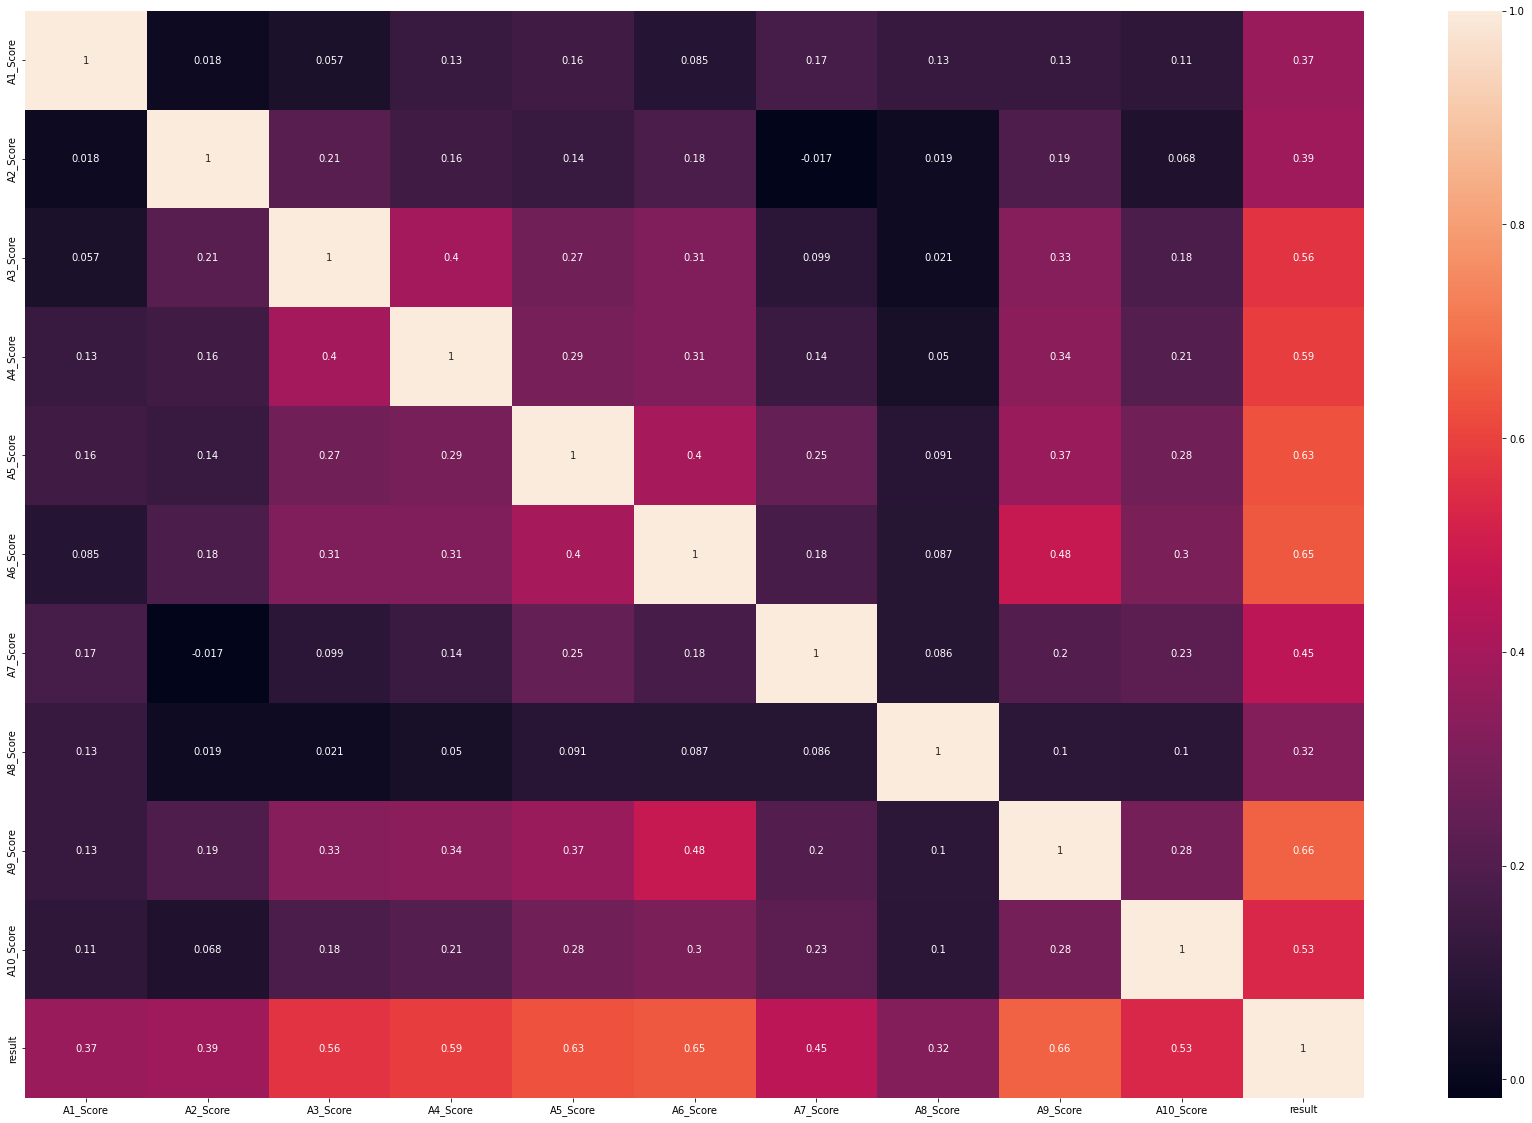

In [151]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

In [152]:
data.drop('contry_of_res', axis = 1, inplace = True)

In [153]:
data.shape

(2508, 19)

In [154]:
data_4 = pd.read_csv("../DataSet/Screening/Autism toddler/new Toddler Autism dataset July 2018.csv")

In [155]:
frames = [data_4, data]
data = pd.concat(frames)

In [156]:
data.shape

(3562, 20)

In [158]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [159]:
data.to_csv('../DataSet/Screening/data.csv')

In [162]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,age,gender,ethnicity,jaundice,relation,austim,age_desc,Class/ASD
0,0,0,0,0,0,0,1,1,0,1,3.0,2.333333,0,middle eastern,1,family member,NaN,1-3 years,0
1,1,1,0,0,0,1,1,0,0,0,4.0,3.0,1,White European,1,family member,NaN,1-3 years,1
2,1,0,0,0,0,0,1,1,0,1,4.0,3.0,1,middle eastern,1,family member,NaN,1-3 years,1
3,1,1,1,1,1,1,1,1,1,1,10.0,2.0,1,Hispanic,0,family member,NaN,1-3 years,1
4,1,1,0,1,1,1,1,1,1,1,9.0,1.666667,0,White European,0,family member,NaN,1-3 years,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,7.0,25,0,White-European,0,Self,0,'18 and more',1
700,1,0,0,0,0,0,0,1,0,1,3.0,34,1,Hispanic,0,family member,0,'18 and more',0
701,1,0,1,1,1,0,1,1,0,1,7.0,24,0,White-European,0,Self,0,'18 and more',1
702,1,0,0,1,1,0,1,0,1,1,6.0,35,1,'South Asian',0,Self,0,'18 and more',0
